# Universidade Federal do ABC

## Nome: Rafael Costa Fernandes
## RA: 21201920754

# Relatorio - Laboratorio n.2

## Resumo

## Metodologia

## Resultados

## Exercicio 1

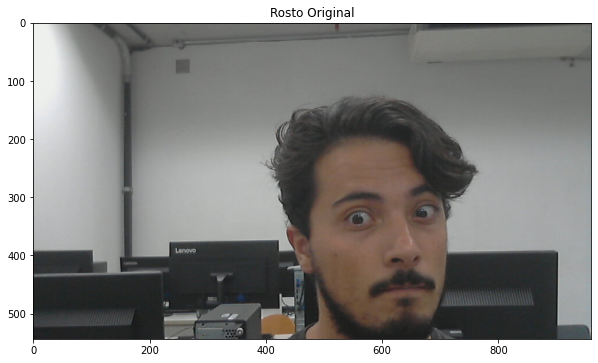

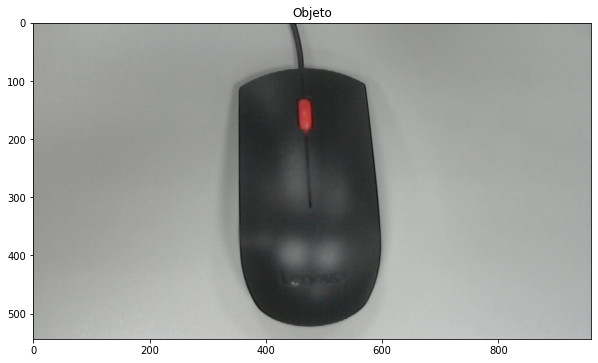

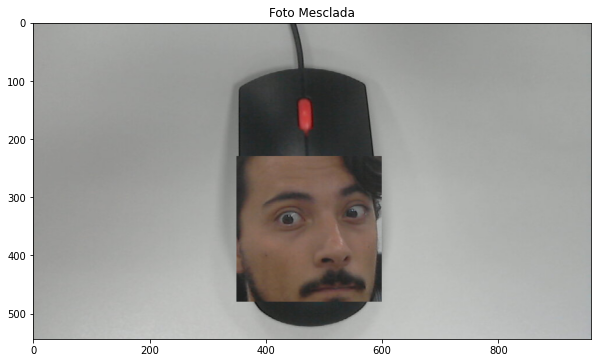

Foto Salva em fotos_ex/mistura_ROI.jpg


In [1]:
# INF209B − TOPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
# VISAO COMPUTACIONAL
#
# PRATICA 02
#
# RA: 21201920754
# NOME: RAFAEL COSTA FERNANDES
#
# E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR
#
# DESCRICAO:
# Exercicio n.1
# Importa a duas fotos tiradas no experimento anterior
# Seleciona o ROI da foto do rosto e aplica em uma posicao escolhida no objeto
# Salva a imagem final

from matplotlib import pyplot as plt
import numpy as np
import cv2 

img = cv2.cvtColor(cv2.imread('fotos_ex/rosto.jpg'),cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('Rosto Original')
plt.show()
obj = cv2.cvtColor(cv2.imread('fotos_ex/objeto.jpg'),cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(obj)
plt.title('Objeto')
plt.show()

in_h = 470
in_v = 230
fim_h = 470+250
fim_v = 230+250

ROI = img[in_v:fim_v, in_h:fim_h]
obj[in_v:fim_v, in_h-120:fim_h-120]= ROI
plt.figure(figsize=(10,10))
plt.imshow(obj)
plt.title('Foto Mesclada')
plt.show()
cv2.imwrite('fotos_ex/mistura_ROI.jpg',obj)
print('Foto Salva em fotos_ex/mistura_ROI.jpg')


# Exercicio 2

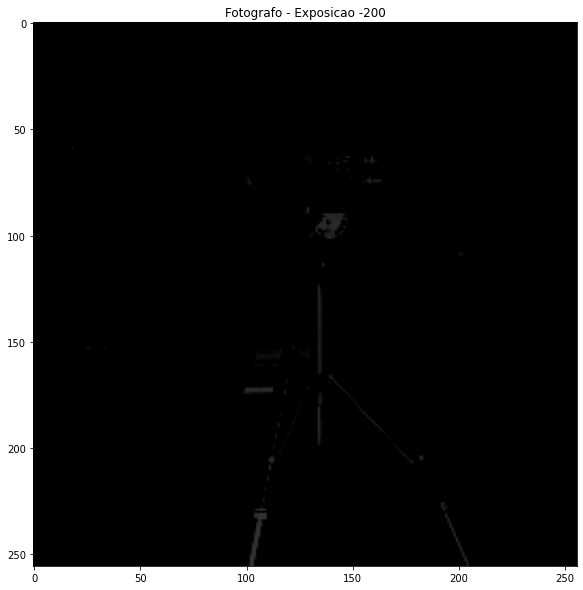

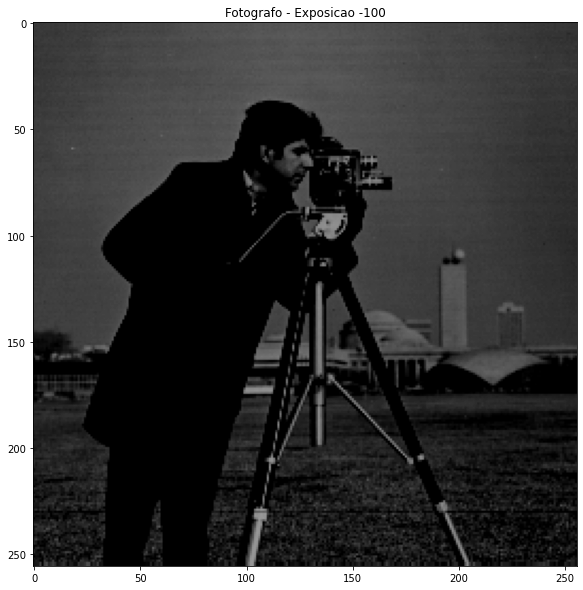

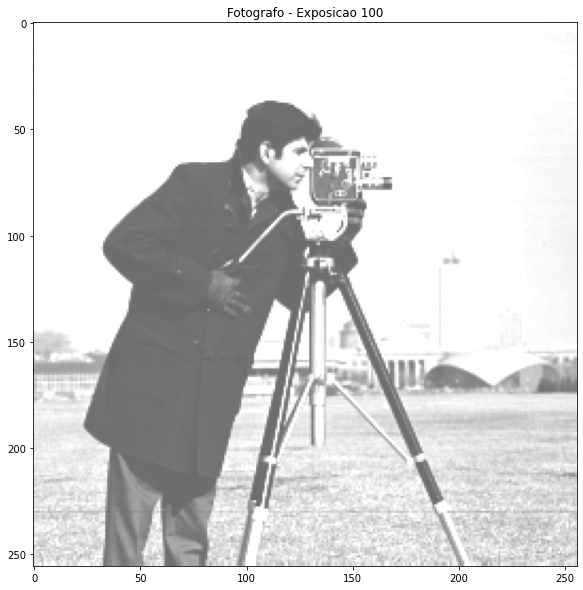

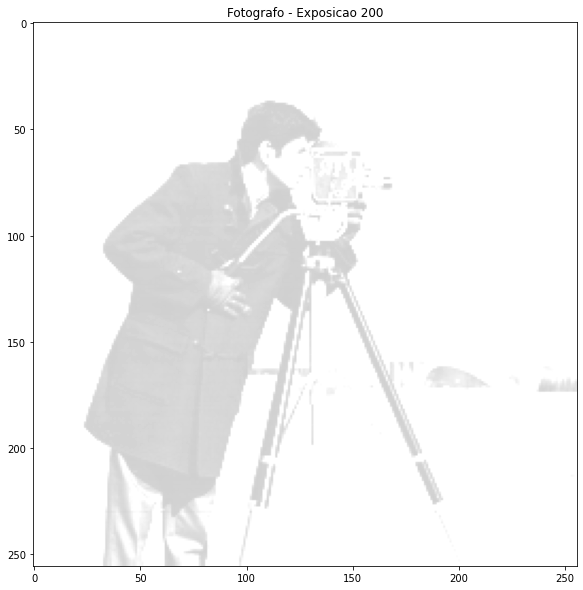

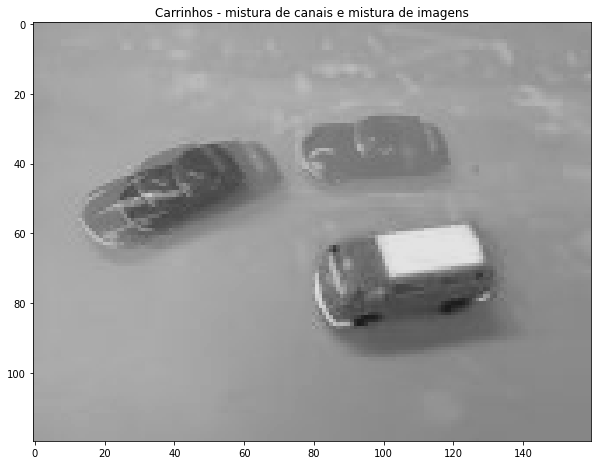

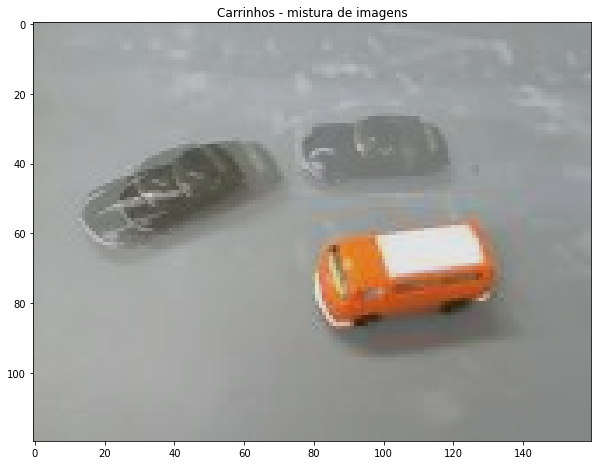

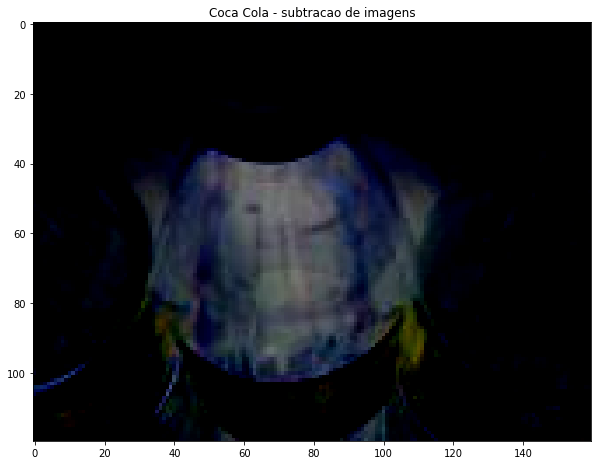

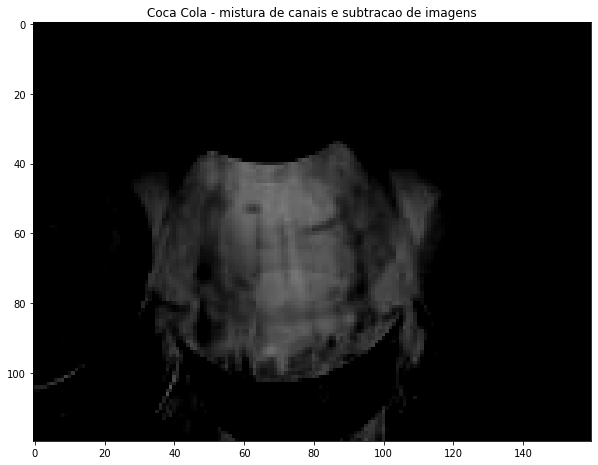

In [19]:
# INF209B − TOPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
# VISAO COMPUTACIONAL
#
# PRATICA 02
#
# RA: 21201920754
# NOME: RAFAEL COSTA FERNANDES
#
# E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR
#
# DESCRICAO:
# Exercicio n.2 - Fazendo as imagens demonstradas em aula
# Descricao no passo a passo do algoritmo


from matplotlib import pyplot as plt
import numpy as np
import cv2

#Aumenta exposicao da foto cameramam em um valor constante

img_camera = cv2.imread('arquivos_auxiliares/cameraman.tif')
img_camera = cv2.cvtColor(img_camera, cv2.COLOR_BGR2GRAY)
(largura,altura) = img_camera.shape[:2]

ctes = [-200,-100,100,200]

for cte in ctes:
    for ii in range(largura):
        for jj in range(altura): #faz a soma pixel a pixel, com um teste de overflow (para evitar overflow no teste, dividido por 2)
                if img_camera[ii,jj]/2 + cte/2>255/2: 
                    img_camera[ii,jj] = 255
                elif img_camera[ii,jj]/2+127+cte/2<127:
                    img_camera[ii,jj] = 0
                else:
                    img_camera[ii,jj] = img_camera[ii,jj] + cte
    plt.figure(figsize=(10,10)) 
    plt.imshow(img_camera, cmap='gray', vmin=0, vmax=255)
    str = ("Fotografo - Exposicao %i" %(cte))
    plt.title(str)
    plt.show()
    img_camera = cv2.imread('arquivos_auxiliares/cameraman.tif')
    img_camera = cv2.cvtColor(img_camera, cv2.COLOR_BGR2GRAY)


#Soma ponderada das imagens dos carrinhos em escala de cinza 8 bits

img4 = cv2.imread('arquivos_auxiliares/toycars1.png')
img5 = cv2.imread('arquivos_auxiliares/toycars2.png')
img6 = cv2.imread('arquivos_auxiliares/toycars3.png')

a = 0.2989
b = 0.5870
c = 0.1140
cte = 0.3

img4_c = np.uint8(a*img4[:,:,0] + b*img4[:,:,1] + c*img4[:,:,2])
img5_c = np.uint8(a*img5[:,:,0] + b*img5[:,:,1] + c*img5[:,:,2])
img6_c = np.uint8(a*img6[:,:,0] + b*img6[:,:,1] + c*img6[:,:,2])
imgp_c = img4_c

(largura,altura) = img4_c.shape[:2]
for ii in range(largura):
    for jj in range(altura):
        #faz a soma pixel a pixel, com um teste de overflow (para evitar overflow no teste, dividido por 3)    
        if cte*img4_c[ii,jj]/3+cte*img5_c[ii,jj]/3+cte*img6_c[ii,jj]/3>255/3: 
            imgp_c[ii,jj] = cte*img4_c[ii,jj]+cte*img5_c[ii,jj]+cte*img6_c[ii,jj]
        else:
            imgp_c[ii,jj] = cte*img4_c[ii,jj]+cte*img5_c[ii,jj]+cte*img6_c[ii,jj]
plt.figure(figsize=(10,10)) 
plt.imshow(imgp_c, cmap='gray', vmin=0, vmax=255)
plt.title('Carrinhos - mistura de canais e mistura de imagens')
plt.show()

#Soma ponderada das imagens dos carrinhos em BGR 8 bits

imgp_col = img4
(largura,altura) = img4.shape[:2]
for ii in range(largura):
    for jj in range(altura):
        for k in range(3):
            #faz a soma em cada canal de cor, pixel a pixel, com um teste de overflow (para evitar overflow no teste, dividido por 3)
            if cte*img4[ii,jj,k]/3+cte*img5[ii,jj,k]/3+cte*img6[ii,jj,k]/3>255/3:
                imgp_col[ii,jj,k] = cte*img4[ii,jj,k]+cte*img5[ii,jj,k]+cte*img6[ii,jj,k]
            else:
                imgp_col[ii,jj,k] = cte*img4[ii,jj,k]+cte*img5[ii,jj,k]+cte*img6[ii,jj,k]
plt.figure(figsize=(10,10))                
plt.imshow(cv2.cvtColor(imgp_col,cv2.COLOR_BGR2RGB))
plt.title('Carrinhos - mistura de imagens')
plt.show()

#Subtracao das imagens de coca-cola colorida

img7 = cv2.imread('arquivos_auxiliares/cola1.png')
img8 = cv2.imread('arquivos_auxiliares/cola2.png')

(largura,altura) = img7.shape[:2]
img_sub = np.zeros([largura,altura,3], dtype=np.uint8)

for ii in range(largura):
    for jj in range(altura):
        for k in range(3):
            #Faz a subtracao em cada canal de cor, pixel a pixel, para evitar underflow, soma-se 255/2 no teste.
            if img7[ii,jj,k]/2-img8[ii,jj,k]/2+255/2<255/2:
                img_sub[ii,jj,k] = 0
            else:
                img_sub[ii,jj,k] = img7[ii,jj,k]-img8[ii,jj,k]
plt.figure(figsize=(10,10))            
plt.imshow(img_sub)
plt.title('Coca Cola - subtracao de imagens')
plt.show()

#Subtracao das imagens de coca-cola em escala de cinzas

a = 0.2989
b = 0.5870
c = 0.1140

#Soma os canais coloridos da imagem, seguindo os parametros de ponderacao a, b, c.
#Nao ha necessidade de protecao de overflow, visto que a soma a+b+c=0.99.

img7_c = np.uint8(a*img7[:,:,0] + b*img7[:,:,1] + c*img7[:,:,2])
img8_c = np.uint8(a*img8[:,:,0] + b*img8[:,:,1] + c*img8[:,:,2])


(largura,altura) = img7_c.shape[:2]
img_sub_c = np.zeros([largura,altura], dtype=np.uint8)
for ii in range(largura):
    for jj in range(altura):
        if (img7_c[ii,jj]/2-img8_c[ii,jj]/2)+255/2<255/2:
            img_sub_c[ii,jj] = 0
        else:
            img_sub_c[ii,jj] = img7_c[ii,jj]-img8_c[ii,jj]
plt.figure(figsize=(10,10))              
plt.imshow(img_sub_c, cmap='gray', vmin=0, vmax=255)
plt.title('Coca Cola - mistura de canais e subtracao de imagens')
plt.show()




# Exercicio 3

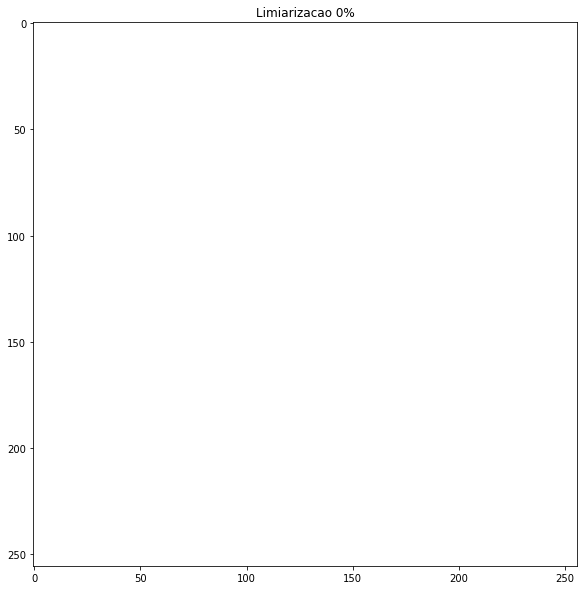

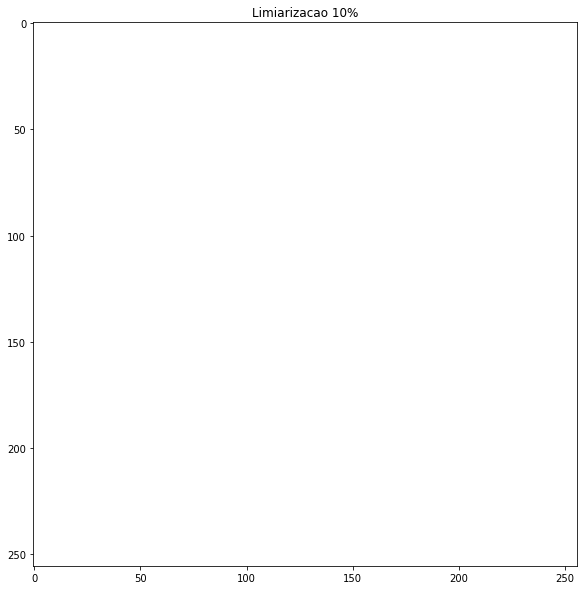

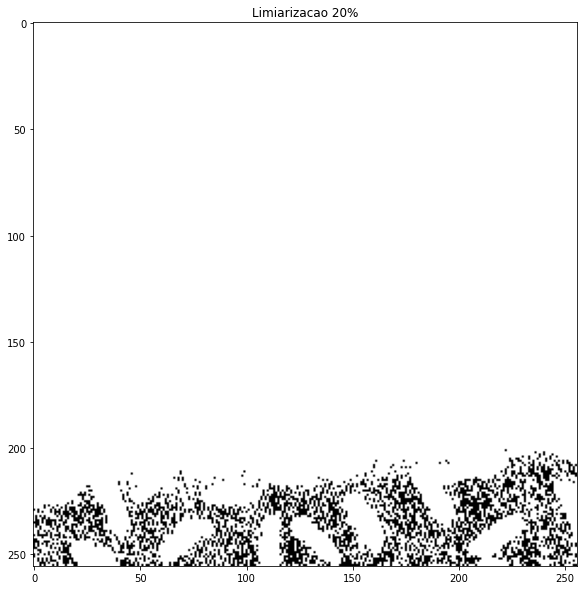

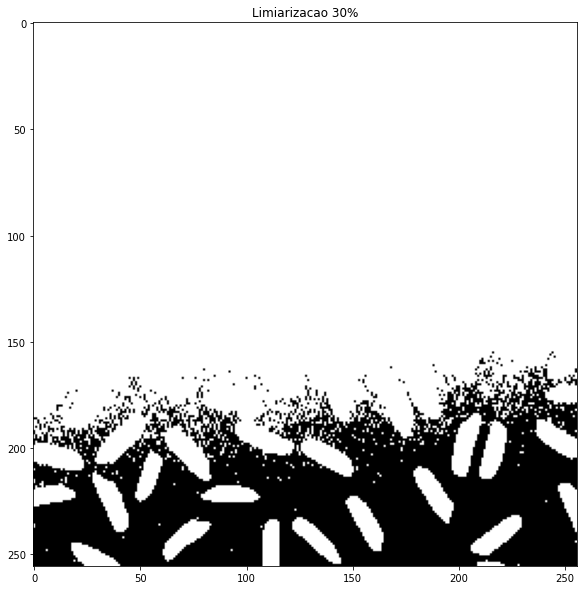

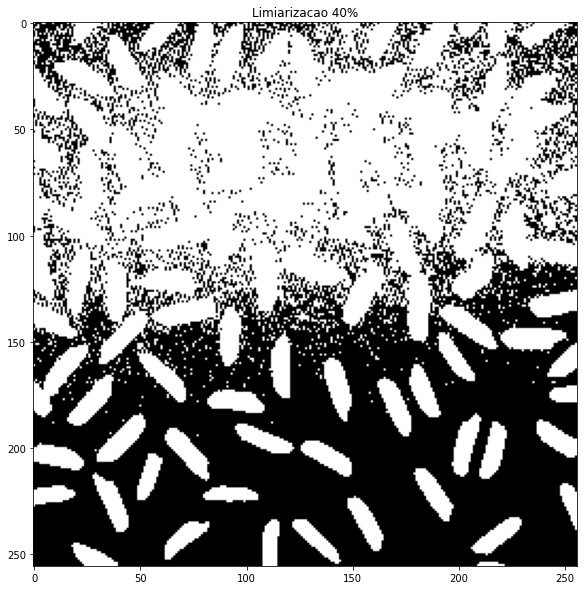

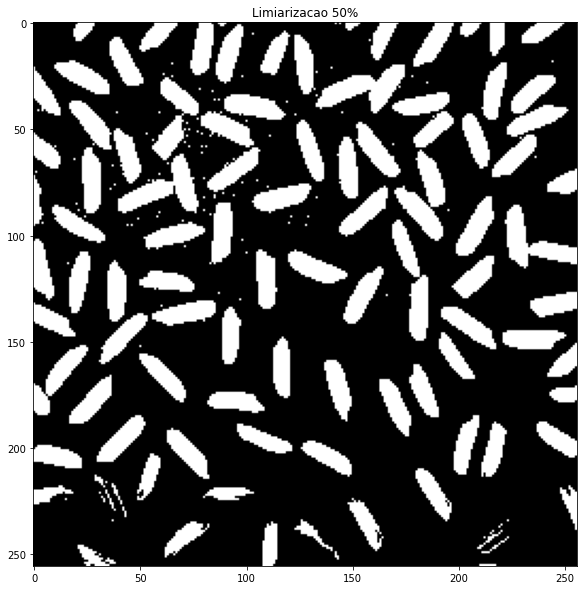

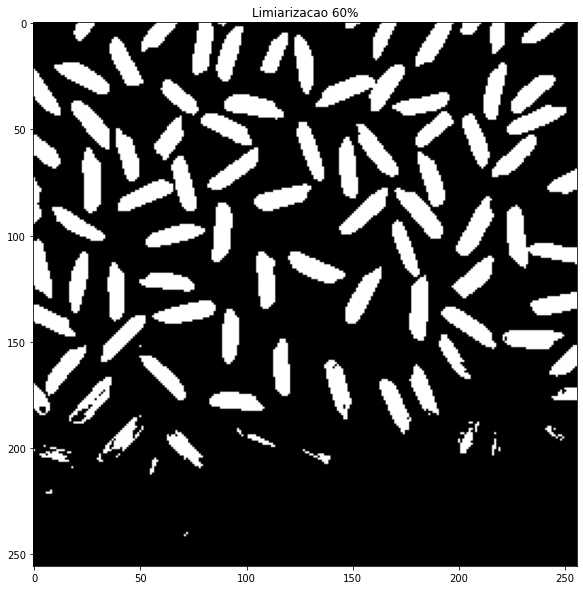

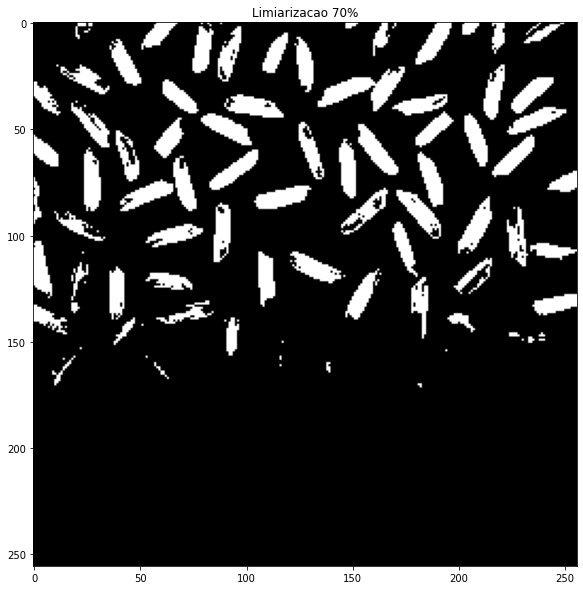

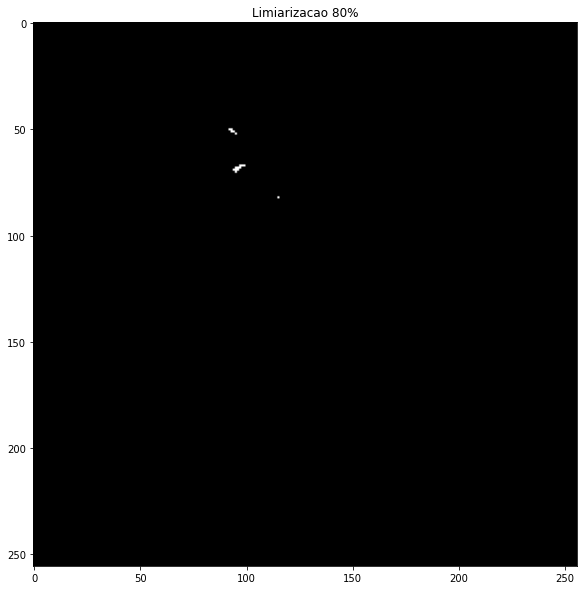

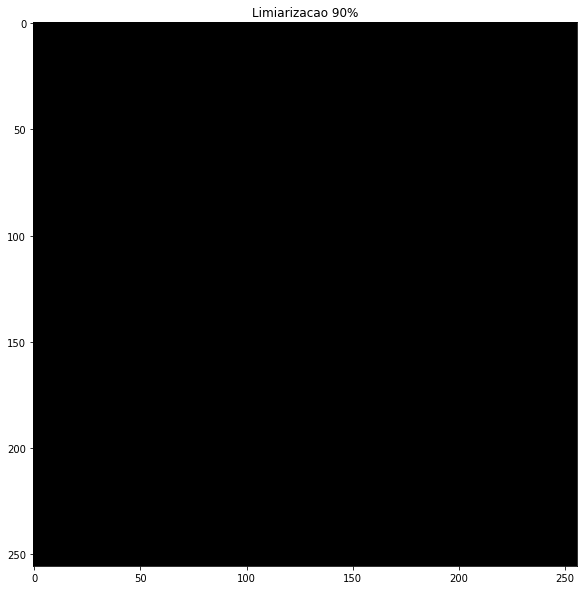

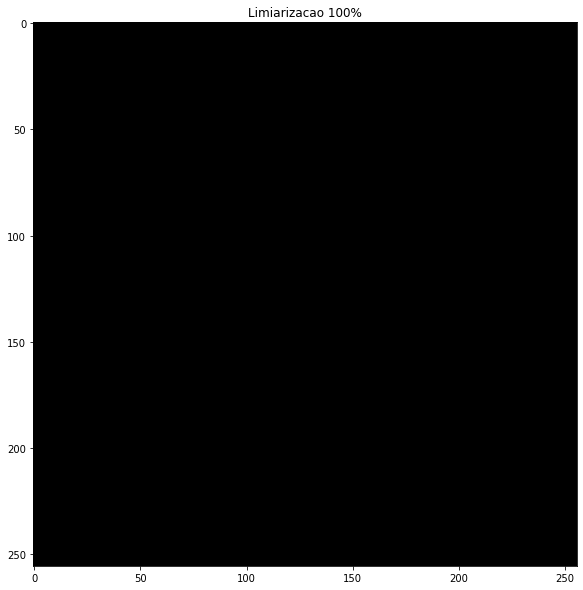

In [6]:
# INF209B − TOPICOS ESPECIAIS EM PROCESSAMENTO DE SINAIS:
# VISAO COMPUTACIONAL
#
# PRATICA 02
#
# RA: 21201920754
# NOME: RAFAEL COSTA FERNANDES
#
# E−MAIL: COSTA.FERNANDES@UFABC.EDU.BR
#
# DESCRICAO:
# Exercicio n.3 - Limiarizacao
# Abre uma foto e realiza dez passos de limiarizacao, de 0 a 100%.
# Operacao pixel a pixel, o openCv trabalha com intensidades 0 para o valor Falso e 255 para o valor True.

from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('arquivos_auxiliares/rice.png')
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lim = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]



(altura,largura) = img.shape[:2]
thr = np.zeros([altura,largura], dtype=np.uint8)

for k in lim:
    for ii in range(largura):
        for jj in range(altura):
            thr_v = k*255
            if img_g[ii,jj] < thr_v:
                thr[ii,jj] = 0
            else:
                thr[ii,jj] = 255
    plt.figure(figsize=(10,10))
    plt.imshow(thr, cmap='gray', vmin=0, vmax=255)
    str = ("Limiarizacao %i%%" % (k*100))
    plt.title(str)
    plt.show()


# Exercicio 4

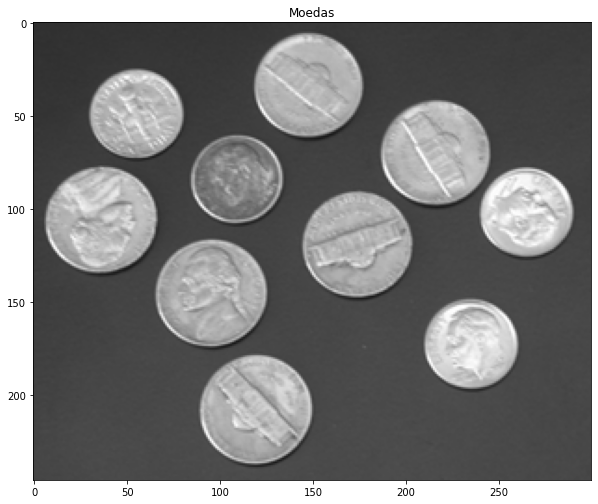

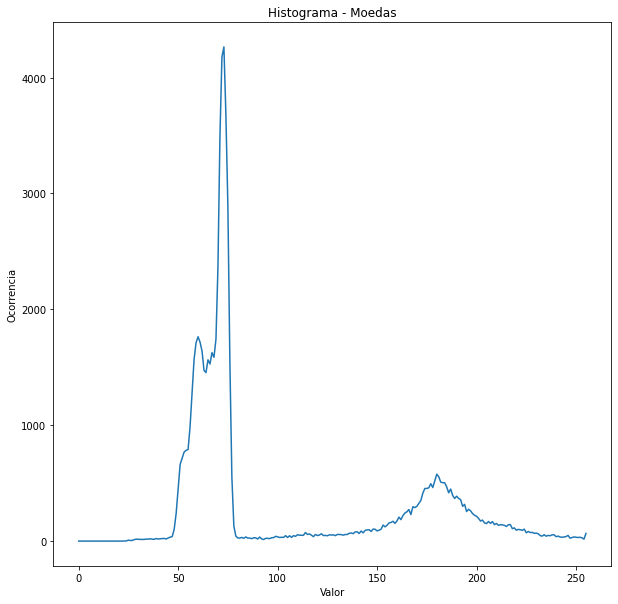

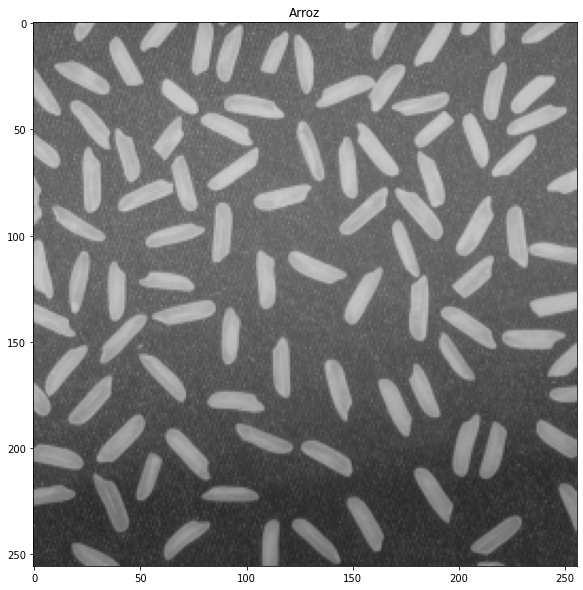

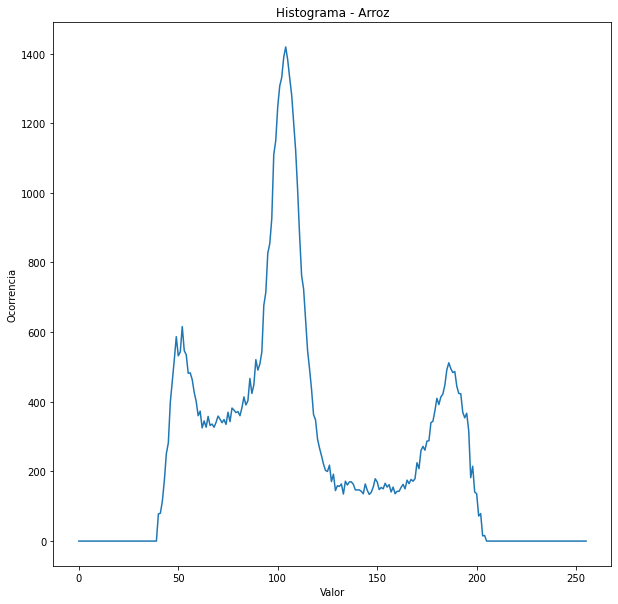

In [11]:
%run ex4.py

# Exercicio 5

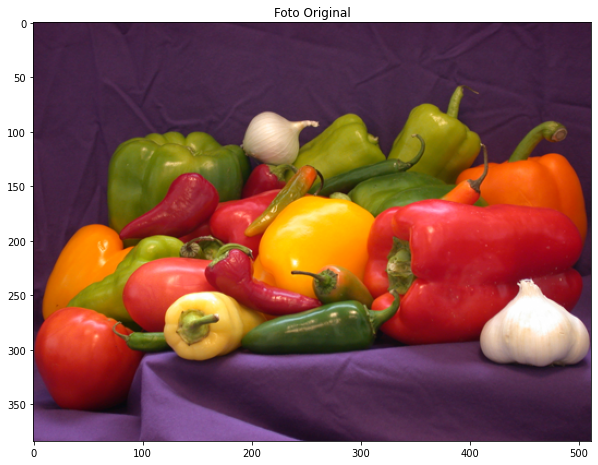

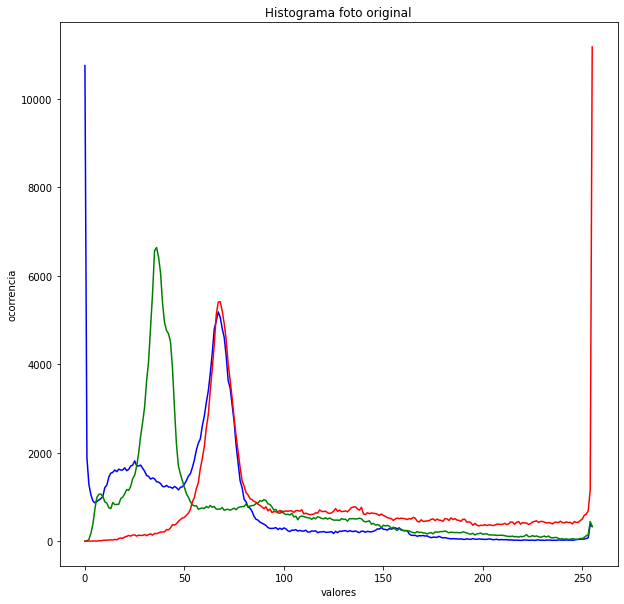

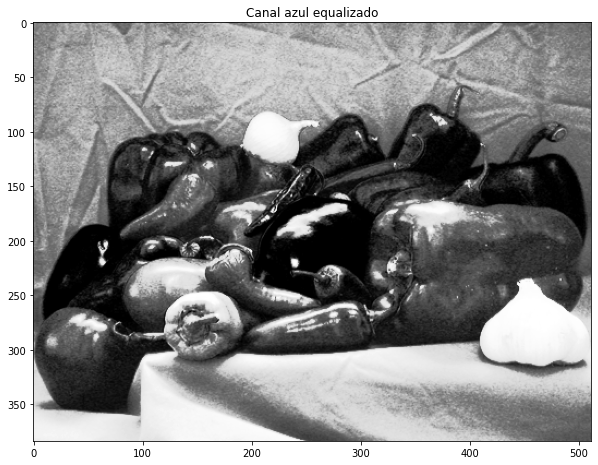

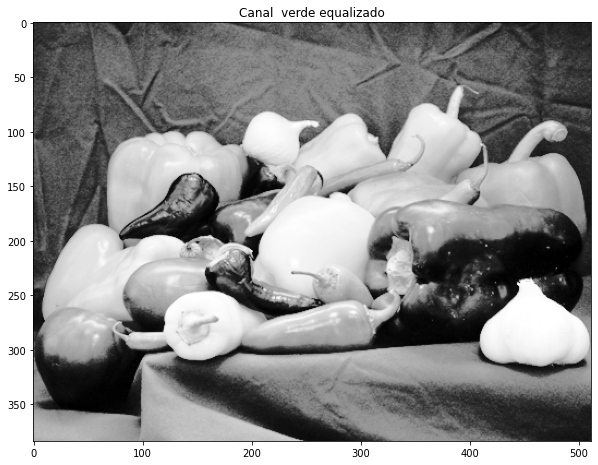

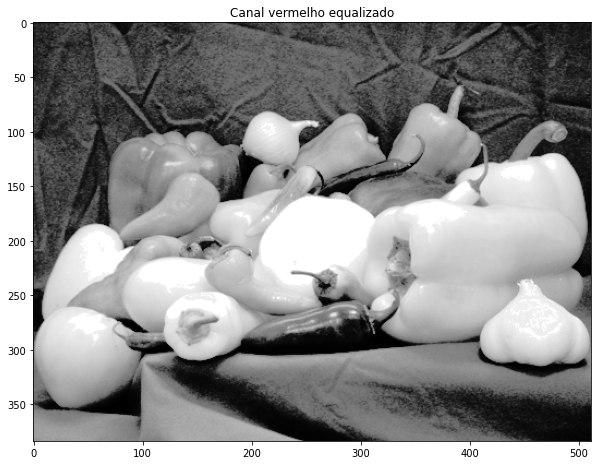

[[142 142 142 ... 111 106 106]
 [131 142 142 ... 106 103 108]
 [122 131 136 ... 106 111 111]
 ...
 [239 239 240 ...  86  88  81]
 [237 238 239 ...  83  90  91]
 [237 238 238 ...  80  86  93]]


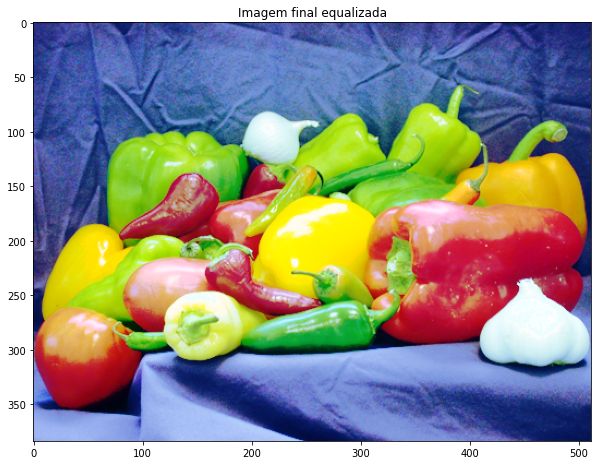

In [26]:
%run ex5.py

# Exercicio 6

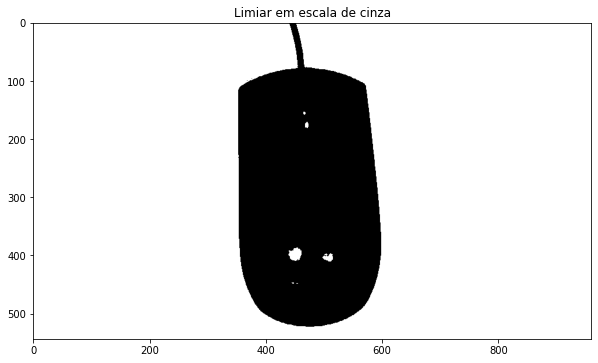

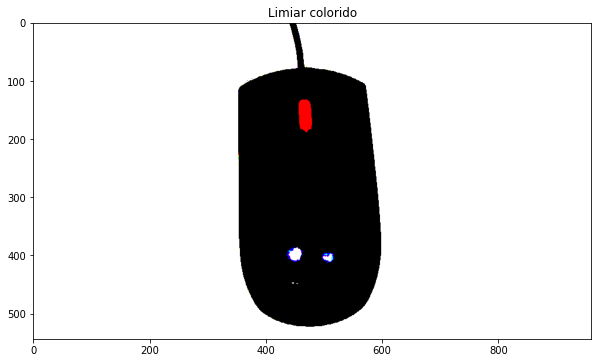

In [27]:
%run ex6.py

# Exercicio 7

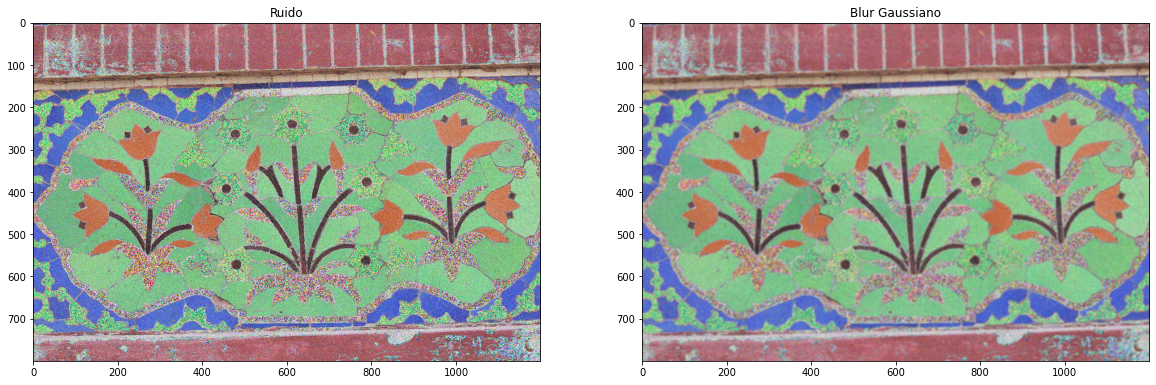

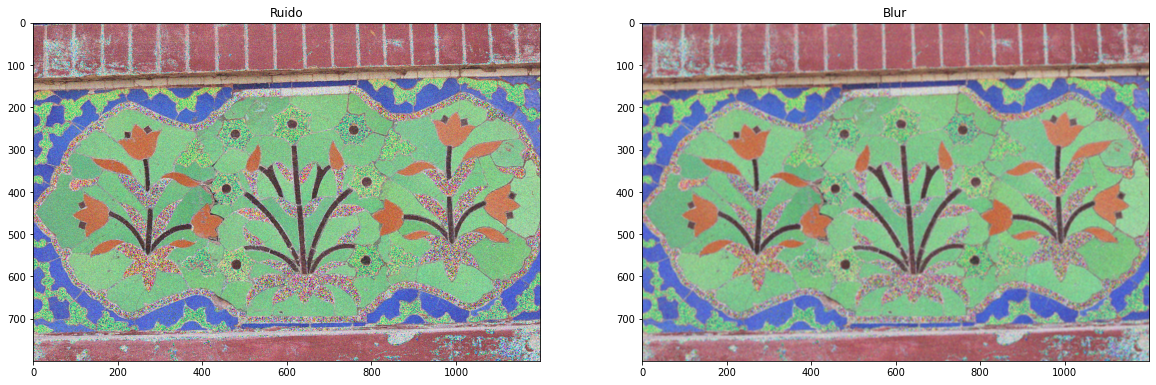

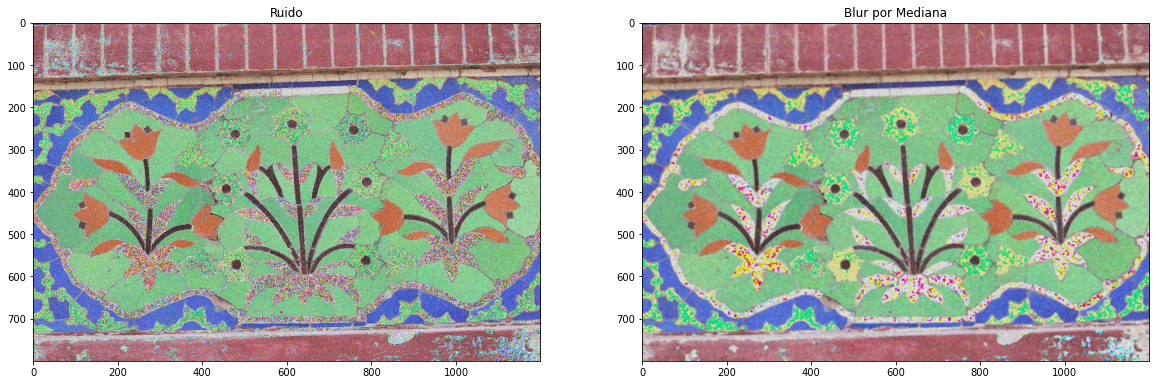

In [30]:
%run ex7.py

# Conclusoes e Discussoes